This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [10]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model2 = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model3 = get_model()
history_orignal = model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 20ms/step - loss: 0.6058 - accuracy: 0.8160 - val_loss: 0.3029 - val_accuracy: 0.9066
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2572 - accuracy: 0.9199 - val_loss: 0.1743 - val_accuracy: 0.9498
Epoch 3/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1665 - accuracy: 0.9485 - val_loss: 0.1493 - val_accuracy: 0.9540
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1229 - accuracy: 0.9620 - val_loss: 0.2096 - val_accuracy: 0.9378
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0911 - accuracy: 0.9711 - val_loss: 0.1568 - val_accuracy: 0.9546
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.1291 - val_accuracy: 0.9633
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.1812 - val_accuracy: 0.9524

In [3]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

**Plotting a validation accuracy comparison**

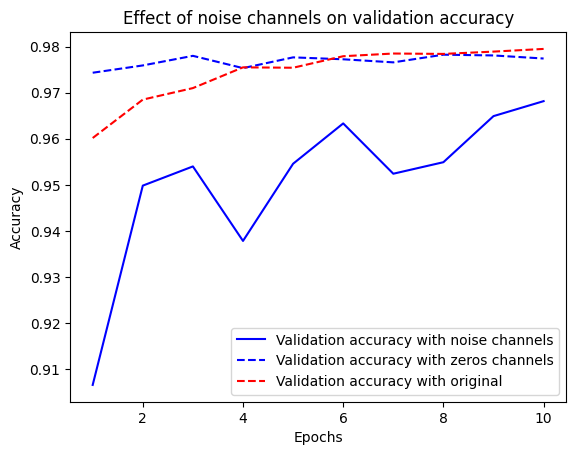

In [12]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_orignal.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original")
plt.title("Effect of noise channels on validation accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3150 - accuracy: 0.1030 - val_loss: 2.3048 - val_accuracy: 0.1023
Epoch 2/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2999 - accuracy: 0.1151 - val_loss: 2.3097 - val_accuracy: 0.1013
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2921 - accuracy: 0.1262 - val_loss: 2.3181 - val_accuracy: 0.1044
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2819 - accuracy: 0.1377 - val_loss: 2.3229 - val_accuracy: 0.1006
Epoch 5/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2650 - accuracy: 0.1489 - val_loss: 2.3327 - val_accuracy: 0.1040
Epoch 6/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2463 - accuracy: 0.1635 - val_loss: 2.3591 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2237 - accuracy: 0.1794 - val_loss: 2.3603 - val_accuracy:

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.5353 - accuracy: 0.8261 - val_loss: 0.2156 - val_accuracy: 0.9426
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1560 - accuracy: 0.9541 - val_loss: 0.1987 - val_accuracy: 0.9525
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1149 - accuracy: 0.9663 - val_loss: 0.1636 - val_accuracy: 0.9613
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0906 - accuracy: 0.9737 - val_loss: 0.1729 - val_accuracy: 0.9628
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0776 - accuracy: 0.9771 - val_loss: 0.1766 - val_accuracy: 0.9636
Epoch 6/10
375/375 [==============================] - 5s 15ms/step - loss: 0.0682 - accuracy: 0.9804 - val_loss: 0.1860 - val_accuracy: 0.9632
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0599 - accuracy: 0.9829 - val_loss: 0.1985 - val_accuracy: 0.9647

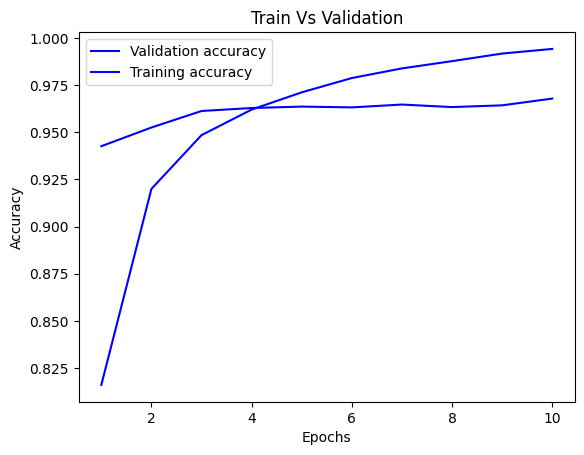

In [21]:
import matplotlib.pyplot as plt
history_train = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
val_acc_train = history_train.history["val_accuracy"]
val_acc_noise = history_noise.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_train, "b-",
         label="Validation accuracy")
plt.plot(epochs, val_acc_noise, "b-",
         label="Training accuracy")
plt.title("Train Vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 832.7271 - accuracy: 0.3533 - val_loss: 2.8532 - val_accuracy: 0.2255
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.6678 - accuracy: 0.2464 - val_loss: 2.0530 - val_accuracy: 0.2222
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5916 - accuracy: 0.2606 - val_loss: 2.0796 - val_accuracy: 0.2701
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 2.7942 - accuracy: 0.2575 - val_loss: 2.0853 - val_accuracy: 0.2452
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3028 - accuracy: 0.2384 - val_loss: 1.9806 - val_accuracy: 0.2668
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4184 - accuracy: 0.2467 - val_loss: 2.0419 - val_accuracy: 0.2777
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 2.2847 - accuracy: 0.2487 - val_loss: 2.1438 - val_accuracy: 0.22

**The same model with a more appropriate learning rate**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
histoy_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.3336 - accuracy: 0.9127 - val_loss: 0.1362 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1272 - accuracy: 0.9641 - val_loss: 0.1404 - val_accuracy: 0.9630
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0972 - accuracy: 0.9741 - val_loss: 0.1486 - val_accuracy: 0.9666
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0854 - accuracy: 0.9784 - val_loss: 0.1704 - val_accuracy: 0.9666
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0711 - accuracy: 0.9827 - val_loss: 0.1931 - val_accuracy: 0.9673
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0624 - accuracy: 0.9851 - val_loss: 0.2511 - val_accuracy: 0.9600
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0528 - accuracy: 0.9872 - val_loss: 0.1790 - val_accuracy: 0.9737

Epoch 1/5
375/375 [==============================] - 5s 14ms/step - loss: 2.2900 - accuracy: 0.1188 - val_loss: 2.3152 - val_accuracy: 0.1115
Epoch 2/5
375/375 [==============================] - 4s 11ms/step - loss: 2.2871 - accuracy: 0.1183 - val_loss: 2.3173 - val_accuracy: 0.1112
Epoch 3/5
375/375 [==============================] - 4s 11ms/step - loss: 2.2831 - accuracy: 0.1186 - val_loss: 2.3170 - val_accuracy: 0.1105
Epoch 4/5
375/375 [==============================] - 5s 14ms/step - loss: 2.2806 - accuracy: 0.1204 - val_loss: 2.3249 - val_accuracy: 0.1112
Epoch 5/5
375/375 [==============================] - 4s 12ms/step - loss: 2.2777 - accuracy: 0.1215 - val_loss: 2.3288 - val_accuracy: 0.1107


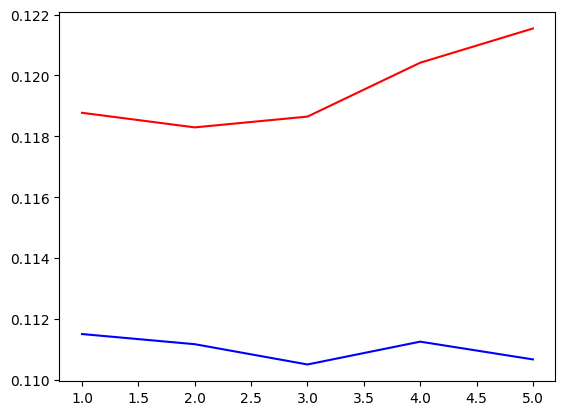

In [19]:
epochs = range(1, 6)
model_history=model.fit(train_images, random_train_labels,
          epochs=5,
          batch_size=128,
          validation_split=0.2)
train_acc_original =model_history.history["accuracy"]
val_acc_original =model_history.history["val_accuracy"]

plt.plot(epochs, train_acc_original, "r-",
         label="Training accuracy ")
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy ")

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [36]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,

SyntaxError: ignored

In [37]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

NameError: ignored

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [22]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5569 - accuracy: 0.7607 - val_loss: 0.4222 - val_accuracy: 0.8612
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3464 - accuracy: 0.8901 - val_loss: 0.3568 - val_accuracy: 0.8542
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2596 - accuracy: 0.9110 - val_loss: 0.2886 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2078 - accuracy: 0.9297 - val_loss: 0.2756 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1733 - accuracy: 0.9415 - val_loss: 0.2786 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1494 - accuracy: 0.9510 - val_loss: 0.2870 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1283 - accurac

**Version of the model with lower capacity**

In [35]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6314 - accuracy: 0.7578 - val_loss: 0.5744 - val_accuracy: 0.8185
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5226 - accuracy: 0.8559 - val_loss: 0.4884 - val_accuracy: 0.8455
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4381 - accuracy: 0.8755 - val_loss: 0.4225 - val_accuracy: 0.8609
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3728 - accuracy: 0.8889 - val_loss: 0.3786 - val_accuracy: 0.8664
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3228 - accuracy: 0.8991 - val_loss: 0.3419 - val_accuracy: 0.8763
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2832 - accuracy: 0.9079 - val_loss: 0.3149 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2520 - accuracy: 0.9181 - val_loss: 0.2973 - val_accuracy: 0.8858
Epoch 8/20
30

**Version of the model with higher capacity**

In [38]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 12s 397ms/step - loss: 0.5768 - accuracy: 0.7205 - val_loss: 0.3894 - val_accuracy: 0.8389
Epoch 2/20
30/30 [==============================] - 11s 367ms/step - loss: 0.3261 - accuracy: 0.8674 - val_loss: 0.2821 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 11s 368ms/step - loss: 0.2325 - accuracy: 0.9073 - val_loss: 0.2827 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 10s 348ms/step - loss: 0.1991 - accuracy: 0.9203 - val_loss: 0.2698 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 10s 322ms/step - loss: 0.1231 - accuracy: 0.9564 - val_loss: 0.3957 - val_accuracy: 0.8563
Epoch 6/20
30/30 [==============================] - 10s 346ms/step - loss: 0.1323 - accuracy: 0.9514 - val_loss: 0.3156 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 11s 364ms/step - loss: 0.0848 - accuracy: 0.9729 - val_loss: 0.3333 - val_accuracy: 0.8885

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [39]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 90ms/step - loss: 0.6160 - accuracy: 0.7710 - val_loss: 0.4770 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4114 - accuracy: 0.8903 - val_loss: 0.3946 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3392 - accuracy: 0.9121 - val_loss: 0.3720 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3003 - accuracy: 0.9251 - val_loss: 0.4148 - val_accuracy: 0.8599
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2836 - accuracy: 0.9290 - val_loss: 0.3631 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2636 - accuracy: 0.9405 - val_loss: 0.3615 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2519 - accuracy: 0.9427 - val_loss: 0.3688 - val_accuracy: 0.8834
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [40]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [41]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.6371 - accuracy: 0.6370 - val_loss: 0.5407 - val_accuracy: 0.7833
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5287 - accuracy: 0.7767 - val_loss: 0.4506 - val_accuracy: 0.8771
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.4571 - accuracy: 0.8268 - val_loss: 0.4174 - val_accuracy: 0.8367
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3962 - accuracy: 0.8677 - val_loss: 0.3476 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3503 - accuracy: 0.8919 - val_loss: 0.3292 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3137 - accuracy: 0.9083 - val_loss: 0.3060 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2785 - accuracy: 0.9201 - val_loss: 0.3093 - val_accuracy: 0.8878
Epoch 8/20
30

## Summary